# Install libraries

In [ ]:
!pip install git+https://github.com/modAL-python/modAL.git

  Cloning https://github.com/modAL-python/modAL.git to /tmp/pip-req-build-q7x_2pkr
  Running command git clone --filter=blob:none --quiet https://github.com/modAL-python/modAL.git /tmp/pip-req-build-q7x_2pkr
  Resolved https://github.com/modAL-python/modAL.git to commit bba6f6fd00dbb862b1e09259b78caf6cffa2e755
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 3.1 MB/s eta 0:00:00
  Created wheel for modAL-python: filename=modAL_python-0.4.2-py3-none-any.whl size=32650 sha256=95758f00101463be613356d29a2b959e885ab3f73a84a7ac03cb8eab0df032e7
  Stored in directory: /tmp/pip-ephem-wheel-cache-xhvhxeqb/wheels/d9/fb/59/7deb61b460c1c36394cd093758986ff7d36f71352dcb2e02c5
Successfully built modAL-python


In [ ]:
!pip install scikeras

# Libraries

In [ ]:
import tensorflow as tf
import os
import numpy as np
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
from tabulate import tabulate
from scikeras.wrappers import KerasClassifier
import seaborn as sns
from keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from prettytable import PrettyTable
from tensorflow.keras.utils import plot_model

import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline


# Dataset

In [ ]:
# Load the 28 x 28 digits library
X, y = fetch_openml('Fashion-MNIST', return_X_y = True, as_frame= False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Data pre-processing

In [ ]:

X = X.reshape((-1, 28, 28, 1))

X = X / 255.0

y = [eval(i) for i in y]
y = np.array(y)




# CNN Architecture

In [ ]:
# Define your CNN architecture
def create_cnn_model():
    model = Sequential([
        Conv2D(33, (2, 2), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(40, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # Adjust the number of output classes as needed
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a function to wrap the Keras model using KerasClassifier
def create_keras_classifier():
  model = KerasClassifier(build_fn=create_cnn_model(), epochs=10, verbose=1, batch_size = 32)
  return model



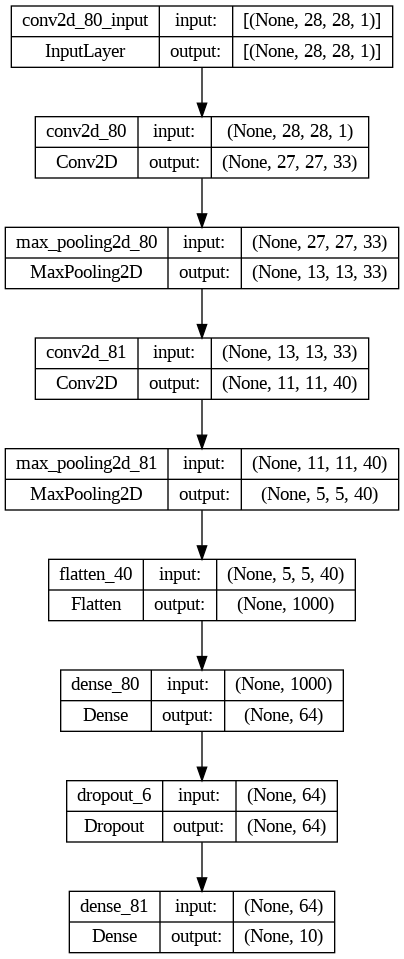

In [ ]:
# Visualize the model architecture
plot_model(create_cnn_model(), show_shapes=True, show_layer_names=True, expand_nested=True)

# Active Learner

In [ ]:
n_initial = 200

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

In [ ]:


# Create an ActiveLearner
learner = ActiveLearner(
    estimator=create_keras_classifier(),
    query_strategy=uncertainty_sampling,
    X_training=X_initial,
    y_training=y_initial
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


7/7 [==============================] - 1s 23ms/step - loss: 2.2791 - accuracy: 0.1500
Epoch 2/10
7/7 [==============================] - 0s 22ms/step - loss: 2.2174 - accuracy: 0.2550
Epoch 3/10
7/7 [==============================] - 0s 24ms/step - loss: 2.0838 - accuracy: 0.3700
Epoch 4/10
7/7 [==============================] - 0s 23ms/step - loss: 1.9143 - accuracy: 0.3700
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 1.7751 - accuracy: 0.3950
Epoch 6/10
7/7 [==============================] - 0s 23ms/step - loss: 1.5429 - accuracy: 0.4850
Epoch 7/10
7/7 [==============================] - 0s 24ms/step - loss: 1.3883 - accuracy: 0.5700
Epoch 8/10
7/7 [==============================] - 0s 23ms/step - loss: 1.3240 - accuracy: 0.5100
Epoch 9/10
7/7 [==============================] - 0s 24ms/step - loss: 1.2434 - accuracy: 0.5800
Epoch 10/10
7/7 [==============================] - 0s 22ms/step - loss: 1.0624 - accuracy: 0.6600


# Active Learning Loop

In [ ]:
n_queries = 20

1224/1224 [==============================] - 11s 9ms/step
(1,)
(1, 28, 28, 1)


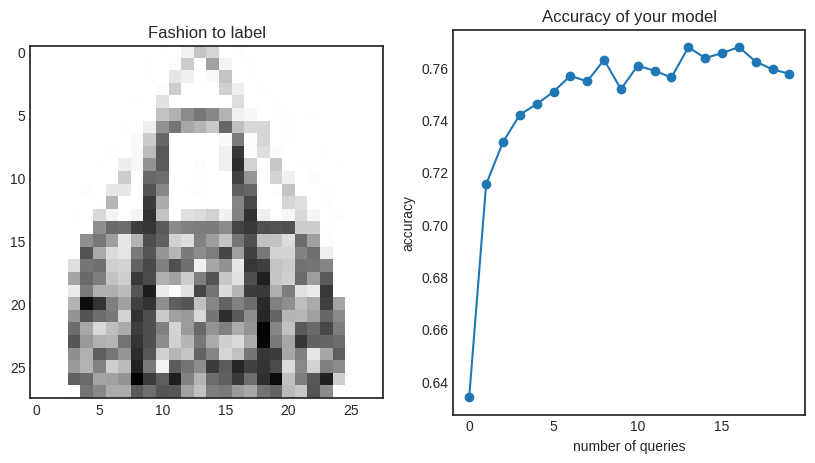

Which fashion item is this? 
8
Epoch 1/10
4/7 [================>.............] - ETA: 0s - loss: 0.0820 - accuracy: 0.9766

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


7/7 [==============================] - 0s 24ms/step - loss: 0.0976 - accuracy: 0.9773
Epoch 2/10
7/7 [==============================] - 0s 24ms/step - loss: 0.1238 - accuracy: 0.9591
Epoch 3/10
7/7 [==============================] - 0s 26ms/step - loss: 0.0665 - accuracy: 0.9818
Epoch 4/10
7/7 [==============================] - 0s 24ms/step - loss: 0.1142 - accuracy: 0.9591
Epoch 5/10
7/7 [==============================] - 0s 24ms/step - loss: 0.0717 - accuracy: 0.9773
Epoch 6/10
7/7 [==============================] - 0s 25ms/step - loss: 0.0931 - accuracy: 0.9682
Epoch 7/10
7/7 [==============================] - 0s 24ms/step - loss: 0.0596 - accuracy: 0.9864
Epoch 8/10
7/7 [==============================] - 0s 23ms/step - loss: 0.0891 - accuracy: 0.9682
Epoch 9/10
7/7 [==============================] - 0s 28ms/step - loss: 0.0436 - accuracy: 0.9955
Epoch 10/10
411/411 [==============================] - 3s 8ms/step


In [ ]:
accuracy_scores = [learner.score(X_val, y_val)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    print(query_idx.shape)
    print(query_inst.shape)
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Fashion to label')
        plt.imshow(query_inst.reshape(28, 28))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')

    # ask for a label for the digit being displayed
    print("Which fashion item is this? ")
    ## user_input = input()
    y_new = np.array([int(input())], dtype=int)


    ##X_initial = np.vstack([X_initial, query_inst])
    ##y_initial = np.append(y_initial, y_new)


    # teach the model with this newly labelled input. fit() would make the model forget everything!
    learner.teach(query_inst, y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_val, y_val))





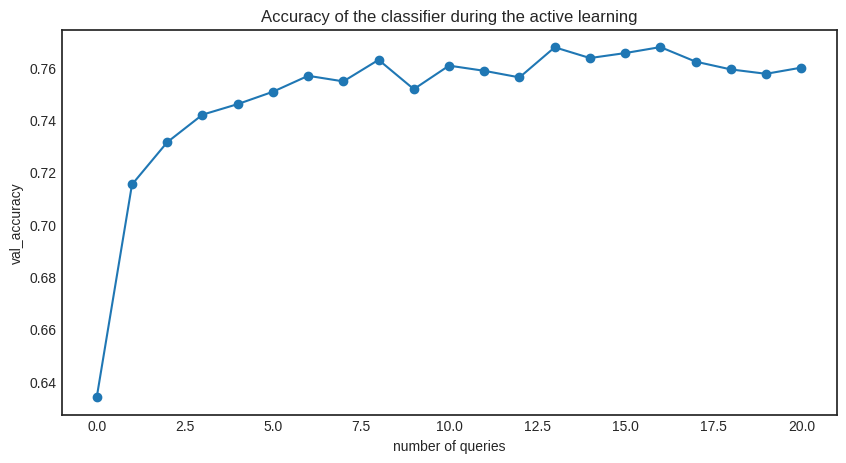

In [ ]:
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(10, 5))
    plt.title('Accuracy of the classifier during the active learning')
    plt.plot(range(n_queries+1), accuracy_scores)
    plt.scatter(range(n_queries+1), accuracy_scores)
    plt.xlabel('number of queries')
    plt.ylabel('val_accuracy')
    plt.show()

# Results

547/547 [==============================] - 5s 8ms/step
Final Active Learning Model Accuracy: 0.7579
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1749
           1       0.98      0.90      0.94      1747
           2       0.59      0.77      0.67      1739
           3       0.73      0.81      0.77      1781
           4       0.70      0.53      0.60      1765
           5       0.93      0.79      0.85      1702
           6       0.43      0.43      0.43      1695
           7       0.87      0.78      0.82      1814
           8       0.96      0.86      0.91      1749
           9       0.79      0.98      0.88      1759

    accuracy                           0.76     17500
   macro avg       0.77      0.76      0.76     17500
weighted avg       0.77      0.76      0.76     17500



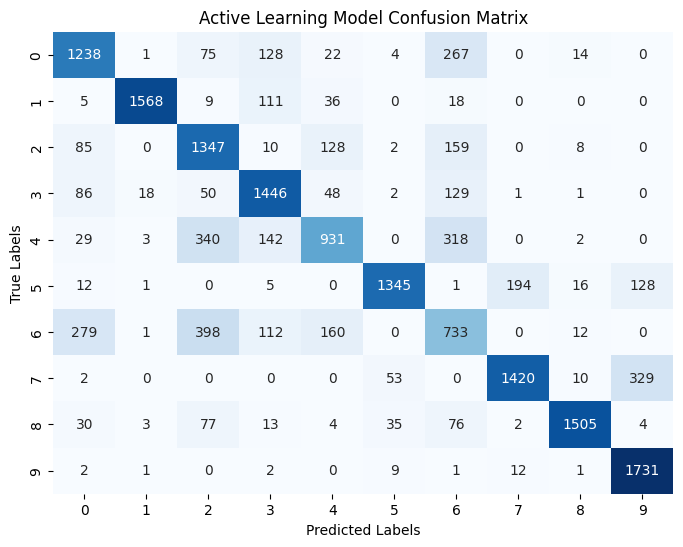

In [ ]:
y_test_pred = learner.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f"Final Active Learning Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report_str)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues)
plt.title("Active Learning Model Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
